In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('../weather.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature_c         10000 non-null  float64
 1   Humidity              10000 non-null  float64
 2   Wind_Speed_kmh        10000 non-null  float64
 3   Wind_Bearing_degrees  10000 non-null  int64  
 4   Visibility_km         10000 non-null  float64
 5   Pressure_millibars    10000 non-null  float64
 6   Rain                  10000 non-null  int64  
 7   Description           10000 non-null  object 
dtypes: float64(5), int64(2), object(1)
memory usage: 625.1+ KB


In [3]:
levels = len(pd.value_counts(df['Description']))
print('There are {} levels in the Description column'.format(levels))

There are 3 levels in the Description column


In [4]:
df_dummies = pd.get_dummies(df,drop_first=True)
df_dummies

,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
0,-0.555556,0.92,11.2700,130,8.0500,1021.60,0,0,0
1,21.111111,0.73,20.9300,330,16.1000,1017.00,1,0,1
2,16.600000,0.97,5.9731,193,14.9086,1013.99,1,1,0
3,1.600000,0.82,3.2200,300,16.1000,1031.59,1,0,0
4,2.194444,0.60,10.8836,116,9.9820,1020.88,1,0,0
...,...,...,...,...,...,...,...,...,...
9995,10.022222,0.95,10.2396,20,4.0089,1007.41,1,1,0
9996,8.633333,0.64,11.0446,80,9.9820,1031.33,1,1,0
9997,5.977778,0.93,11.0446,269,14.9086,1014.21,1,1,0
9998,9.788889,0.78,8.1788,231,7.8246,1005.02,1,1,0


In [5]:
from sklearn.utils import shuffle

df_shuffled = shuffle(df_dummies, random_state=42)

In [7]:
DV = 'Temperature_c'
X = df_shuffled.drop(DV, axis=1)
y = df_shuffled[DV]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
X_train

,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain,Description_Normal,Description_Warm
5757,0.76,8.4525,38,14.9569,1028.63,1,1,0
7510,0.85,12.8800,150,8.0500,1021.90,0,0,0
55,0.47,8.0339,267,10.3523,1015.50,1,0,1
1983,0.28,20.8978,300,10.3684,1008.00,1,1,0
1842,1.00,6.2629,329,0.2254,1028.13,0,0,0
...,...,...,...,...,...,...,...,...
6553,0.56,14.4900,300,16.1000,1012.90,1,0,1
5958,0.93,19.0624,304,8.1788,1004.46,1,1,0
6264,0.76,14.9569,322,9.9820,1013.50,1,1,0
9115,0.72,5.9087,331,15.5526,1023.14,1,1,0


In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train[['Humidity']],y_train)

LinearRegression()

In [16]:
intercept = model.intercept_
coefficient = model.coef_
print(intercept, coefficient) # y절편과 기울기

34.499407598825144 [-30.69215601]


## Exercise23

In [17]:
predictions = model.predict(X_test[['Humidity']])

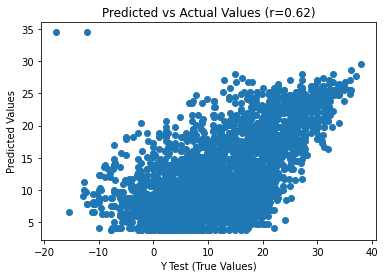

In [18]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values (r={0:0.02f})'.format(pearsonr(y_test,predictions)[0],2))
plt.show()

C:\Users\JDhyeok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


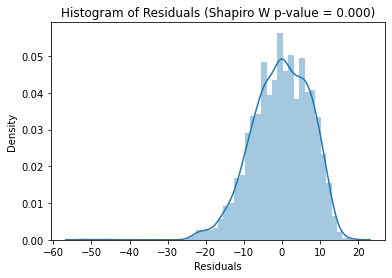

In [27]:
import seaborn as sns
from scipy.stats import shapiro

sns.distplot((y_test-predictions),bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals (Shapiro W p-value = {0:0.03f})'.format(shapiro(y_test-predictions)[1]))
plt.show()

In [32]:
from sklearn import metrics

metrics_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],'Value': [metrics.mean_absolute_error(y_test, predictions),metrics.mean_squared_error(y_test, predictions),np.sqrt(metrics.mean_squared_error(y_test, predictions)),metrics.explained_variance_score(y_test, predictions)]}).round(3)
print(metrics_df)

      Metric   Value
0        MAE   6.052
1        MSE  56.187
2       RMSE   7.496
3  R-Squared   0.389


## Multiple Linear Regression

In [33]:
model2 = LinearRegression()

model2.fit(X_train,y_train)

LinearRegression()

In [36]:
intercept = model2.intercept_
coefficients = model2.coef_
print('Temperature = {0:0.2f} + ({1:0.2f} x Humidity) + ({2:0.2f} x Wind Speed) + ({3:0.2f} x Wind Bearing Degrees) + ({4:0.2f} x Visibility) + ({5:0.2f} x Pressure) + ({6:0.2f} x Rain) + ({7:0.2f} x Normal Weather) + ({8:0.2f} x Warm Weather)'.format(intercept,coefficients[0],coefficients[1],coefficients[2],coefficients[3],coefficients[4],coefficients[5],coefficients[6],coefficients[7]))

Temperature = 3.54 + (-7.93 x Humidity) + (-0.07 x Wind Speed) + (0.00 x Wind Bearing Degrees) + (0.06 x Visibility) + (0.00 x Pressure) + (5.61 x Rain) + (8.54 x Normal Weather) + (19.10 x Warm Weather)


In [38]:
predictions = model2.predict(X_test)

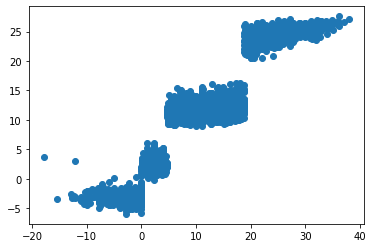

In [39]:
plt.scatter(y_test, predictions)

C:\Users\JDhyeok\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


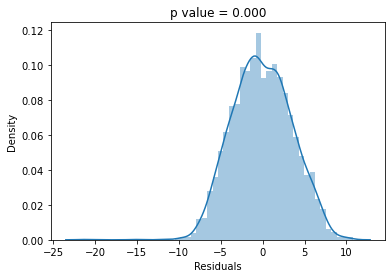

In [43]:
sns.distplot((y_test-predictions),bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('p value = {0:0.03f}'.format(shapiro(y_test-predictions)[1]))
plt.show()

In [44]:
metrics_df = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R-Squared'],'Value': [metrics.mean_absolute_error(y_test, predictions),metrics.mean_squared_error(y_test, predictions),np.sqrt(metrics.mean_squared_error(y_test, predictions)),metrics.explained_variance_score(y_test, predictions)]}).round(3)
print(metrics_df)

      Metric   Value
0        MAE   2.861
1        MSE  12.317
2       RMSE   3.510
3  R-Squared   0.866
